In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [263]:
df = pd.read_csv("uber.csv")
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199995,49:00.0,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,09:00.0,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,42:00.0,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,56:25.0,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1


In [264]:
df.dropna(inplace=True)
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [265]:
df.drop(columns=['key'], axis=1, inplace=True)

In [266]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [267]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14680\2772932758.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare_amount'])


<Axes: xlabel='fare_amount', ylabel='Density'>

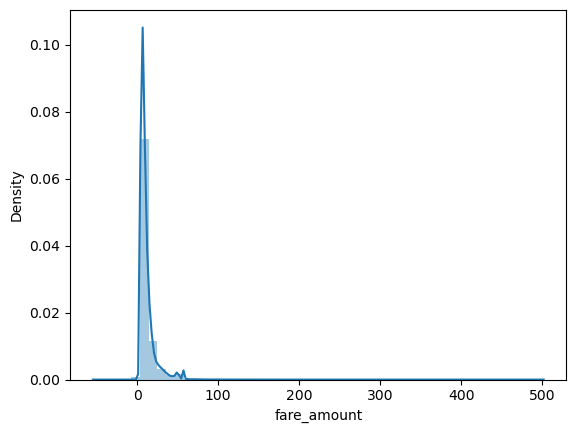

In [268]:
sns.distplot(df['fare_amount'])

In [269]:
df['fare_amount'].describe()

count    199999.000000
mean         11.359892
std           9.901760
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

In [270]:
df = df[df['fare_amount'] > 0]
df['fare_amount'].describe()

count    199977.000000
mean         11.362586
std           9.897063
min           0.010000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

In [271]:
upper_limit = df['fare_amount'].quantile(0.88)
lower_limit = df['fare_amount'].quantile(0.01)
print(upper_limit, lower_limit)

18.5 3.3


In [272]:
df1 = df[(df['fare_amount'] <= upper_limit) & (df['fare_amount'] >= lower_limit)]
df1

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199993,9.5,2012-09-29 19:51:27+00:00,-73.987798,40.721210,-73.980960,40.744388,1
199994,12.0,2014-01-31 14:42:00+00:00,-73.983070,40.760770,-73.972972,40.754177,1
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1


In [273]:
df1['fare_amount'].describe()

count    175025.000000
mean          8.601591
std           3.588812
min           3.300000
25%           5.700000
50%           7.700000
75%          10.900000
max          18.500000
Name: fare_amount, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14680\2813914131.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['fare_amount'])


<Axes: xlabel='fare_amount', ylabel='Density'>

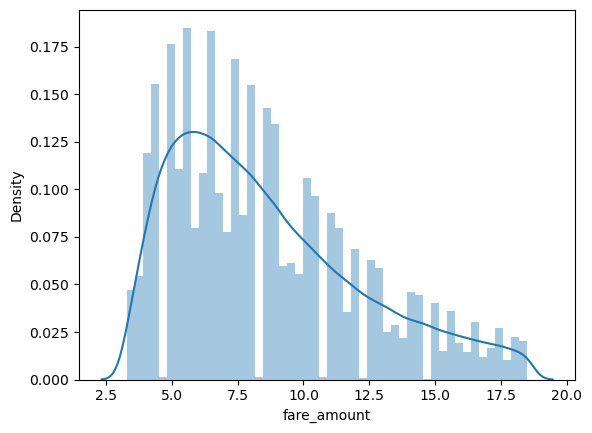

In [274]:
sns.distplot(df1['fare_amount'])

<Axes: >

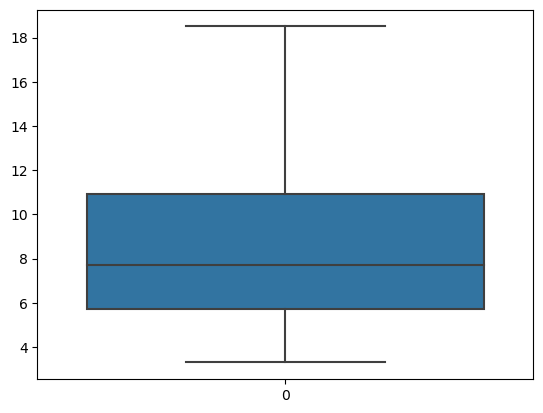

In [275]:
sns.boxplot(df1['fare_amount'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14680\2874175695.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['passenger_count'])


<Axes: xlabel='passenger_count', ylabel='Density'>

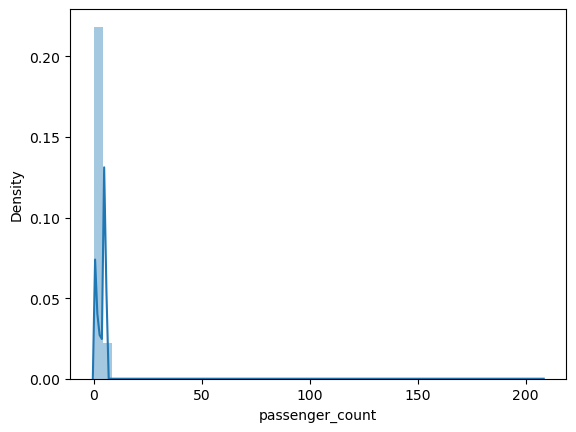

In [276]:
sns.distplot(df1['passenger_count'])

In [277]:
df1['passenger_count'].describe()

count    175025.000000
mean          1.683245
std           1.395762
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [278]:
df1['passenger_count'].value_counts()

1      121260
2       25583
5       12299
3        7815
4        3751
6        3672
0         644
208         1
Name: passenger_count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14680\285488650.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['passenger_count'])


<Axes: xlabel='passenger_count', ylabel='Density'>

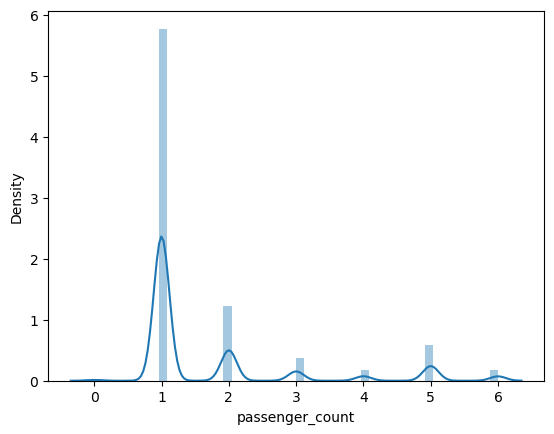

In [279]:
df2 = df1[(df1['passenger_count'] >= 0) & (df1['passenger_count'] <= 6)]
sns.distplot(df2['passenger_count'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14680\1763691072.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = 100 * df2.corr()


<Axes: >

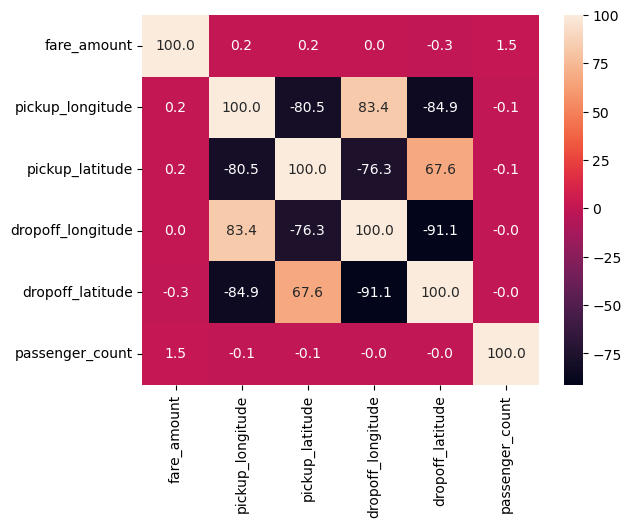

In [280]:
corr = 100 * df2.corr()
sns.heatmap(corr, annot=True, fmt='.1f')

In [316]:
standard_list = ['fare_amount', 'passenger_count']
min_max_list = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

for i in standard_list:
    df[i] = standard_scaler.fit_transform(df[[i]])

for i in min_max_list:
    df[i] = minmax_scaler.fit_transform(df[[i]])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14680\2609205272.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = standard_scaler.fit_transform(df[[i]])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14680\2609205272.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = standard_scaler.fit_transform(df[[i]])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14680\2609205272.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [320]:
X = df2.drop(columns=['fare_amount', 'pickup_datetime'], axis=1)
y = df2['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(140019, 5) (35005, 5)


In [321]:
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

lr_preds = lr.predict(X_test)
rf_preds = rf.predict(X_test)

lr_r2 = r2_score(y_test, lr_preds)
rf_r2 = r2_score(y_test, rf_preds)

lr_rmse = mean_squared_error(y_test, lr_preds, squared=False)
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)

print("R2 scores:")
print("Linear Regression:", lr_r2)
print("Random Forest Regression:", rf_r2)
print("RMSE:")
print("Linear Regression:", lr_rmse)
print("Random Forest Regression:", rf_rmse)

R2 scores:
Linear Regression: 0.0001816456051443316
Random Forest Regression: 0.6959472087060459
RMSE:
Linear Regression: 3.5988085345123446
Random Forest Regression: 1.9845986267777251


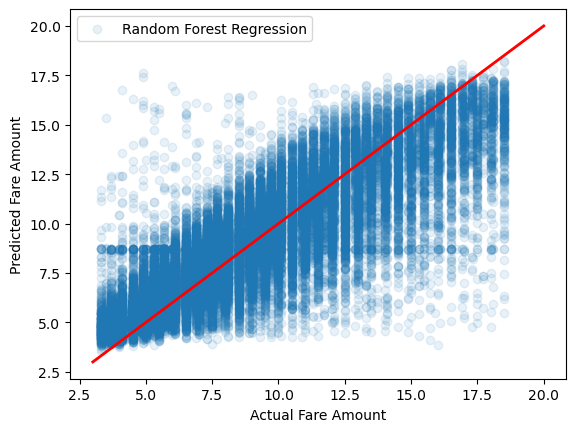

In [322]:
plt.scatter(y_test, rf_preds, label='Random Forest Regression', alpha=0.1)
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.plot([3, 20], [3, 20], color='red', linewidth=2)
plt.legend()
plt.show()

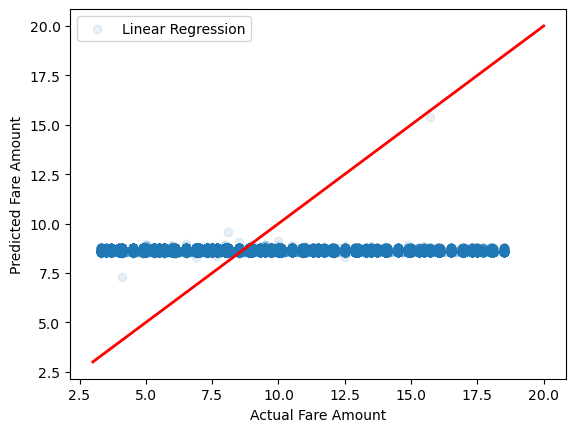

In [323]:
plt.scatter(y_test, lr_preds, label='Linear Regression', alpha=0.1)
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.plot([3, 20], [3, 20], color='red', linewidth=2)
plt.legend()
plt.show()